Goal 

Is to forecast the sales for next year -2020

### Data Cleaning exercise

1. Some date are showing 2109 instead of 2019

In [1]:
import numpy as np
import pandas as pd

import re
from glob import glob
import matplotlib.pyplot as plt 
import seaborn as sb

In [2]:
data_1920 = pd.read_excel('/Users/shiva/Downloads/Sales Report 2019-20.xlsx')
data_1819 = pd.read_excel('/Users/shiva/Downloads/Sales Report 2018-19.xlsx')

In [3]:
files = sorted(glob('/Users/shiva/Downloads/Sale*.xlsx'))
files

['/Users/shiva/Downloads/Sales Report 2018-19.xlsx',
 '/Users/shiva/Downloads/Sales Report 2019-20.xlsx']

In [4]:
print (data_1920.shape,data_1819.shape)

(846, 16) (1136, 16362)


In [5]:
data_1819.head()

,Sl.No.,Branch,Customer Name,Cust PO No.,Description,Qty,Base price,Total Price,Tax Structure,CGST,...,Unnamed: 16352,Unnamed: 16353,Unnamed: 16354,Unnamed: 16355,Unnamed: 16356,Unnamed: 16357,Unnamed: 16358,Unnamed: 16359,Unnamed: 16360,Unnamed: 16361
0,1.0,BLR,Iron Mountain India Pvt Ltd,IMI/2017-18/0026,"AC Cord AC Line Cord, 50-16000-669R AC Line\nC...",3.0,700.0,2100.0,18.0,189.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,BLR,Iron Mountain India Pvt Ltd,IMI/2017-18/0026,"AC Cord AC Line Cord, 50-16000-669R AC Line\nC...",4.0,700.0,2800.0,18.0,252.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,BLR,Iron Mountain India Pvt Ltd,IMI/2017-18/0026,"Battery Pack of 10 MC90XX-G/K,\nMC9190-G, MC92...",1.0,25651.0,25651.0,18.0,2308.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,BLR,Iron Mountain India Pvt Ltd,IMI/2017-18/0046,HP Laserjet Enterprise M608DN printer,1.0,96500.0,96500.0,18.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,BLR,Iron Mountain India Pvt Ltd,IMI/2017-18/0046,HP Laserjet Enterprise M608DN printer,1.0,96500.0,96500.0,18.0,8685.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_1819 = data_1819.iloc[:,0:16]

In [7]:
data_combined = pd.concat((pd.read_excel(file) for file in files),ignore_index=True)

In [8]:
data_combined.shape

(1982, 16363)

In [9]:
data_combined.columns

Index(['Sl.No.', 'Branch ', 'Customer Name', ' Cust PO No.', 'Description',
       'Qty', 'Base price', 'Total Price', 'Tax Structure', 'CGST',
       ...
       'Unnamed: 16353', 'Unnamed: 16354', 'Unnamed: 16355', 'Unnamed: 16356',
       'Unnamed: 16357', 'Unnamed: 16358', 'Unnamed: 16359', 'Unnamed: 16360',
       'Unnamed: 16361', 'SL No '],
      dtype='object', length=16363)

In [10]:
columns_del = []
regex = 'Unnamed:'

for i in data_combined.columns:
    if re.match(regex, i) is not None:
        columns_del.append(i)

In [11]:
data_combined = data_combined.drop(labels=columns_del , axis=1)
data_combined = data_combined.drop(labels='SL No ',axis=1)

In [12]:
data_combined.head()

,Sl.No.,Branch,Customer Name,Cust PO No.,Description,Qty,Base price,Total Price,Tax Structure,CGST,SGST,IGST,Total with tax amount,Inv. No.,Inv.Date,Inv. Value
0,1.0,BLR,Iron Mountain India Pvt Ltd,IMI/2017-18/0026,"AC Cord AC Line Cord, 50-16000-669R AC Line\nC...",3.0,700.0,2100.0,18.0,189.00,189.00,0.0,2478.00,2918191035,2018-04-28 00:00:00,5782
1,2.0,BLR,Iron Mountain India Pvt Ltd,IMI/2017-18/0026,"AC Cord AC Line Cord, 50-16000-669R AC Line\nC...",4.0,700.0,2800.0,18.0,252.00,252.00,0.0,3304.00,2918191035,2018-04-28 00:00:00,0
2,3.0,BLR,Iron Mountain India Pvt Ltd,IMI/2017-18/0026,"Battery Pack of 10 MC90XX-G/K,\nMC9190-G, MC92...",1.0,25651.0,25651.0,18.0,2308.59,2308.59,0.0,30268.18,2918191068,2018-05-30 00:00:00,30268
3,4.0,BLR,Iron Mountain India Pvt Ltd,IMI/2017-18/0046,HP Laserjet Enterprise M608DN printer,1.0,96500.0,96500.0,18.0,0.00,0.00,17370.0,113870.00,2918191048,2018-05-15 00:00:00,113870
4,5.0,BLR,Iron Mountain India Pvt Ltd,IMI/2017-18/0046,HP Laserjet Enterprise M608DN printer,1.0,96500.0,96500.0,18.0,8685.00,8685.00,0.0,113870.00,2918191047,2018-05-15 00:00:00,113870


Clean up headers

In [13]:
data_combined.isnull().sum()

Sl.No.                   874
Branch                     6
Customer Name              2
 Cust PO No.               9
Description                8
Qty                        6
Base price                 7
Total Price                7
Tax Structure              8
CGST                      12
SGST                      18
IGST                       7
Total with tax amount      5
Inv. No.                  33
Inv.Date                  47
Inv. Value               342
dtype: int64

In [14]:
data_combined.isna().sum()

Sl.No.                   874
Branch                     6
Customer Name              2
 Cust PO No.               9
Description                8
Qty                        6
Base price                 7
Total Price                7
Tax Structure              8
CGST                      12
SGST                      18
IGST                       7
Total with tax amount      5
Inv. No.                  33
Inv.Date                  47
Inv. Value               342
dtype: int64

In [15]:
newcolumn = ['slno', 'branch', 'customername', 'custpono', 'description', 'qty',
       'baseprice', 'totalprice', 'taxstructure', 'cgst', 'sgst', 'igst',
       'totalwithtaxamount', 'invno', 'invdate', 'invvalue']

In [16]:
cleanhead = []

for i in range(len(data_combined.columns)):
    cleanhead.append(data_combined.columns[i].replace('.','').strip().lower())

data_combined.columns=cleanhead

In [17]:
data_combined.columns=newcolumn

In [18]:
data_combined.columns

Index(['slno', 'branch', 'customername', 'custpono', 'description', 'qty',
       'baseprice', 'totalprice', 'taxstructure', 'cgst', 'sgst', 'igst',
       'totalwithtaxamount', 'invno', 'invdate', 'invvalue'],
      dtype='object')

In [19]:
data_combined.invdate.fillna(method='ffill',inplace=True)

In [218]:
# Required cell - row has cancelled data

#data_combined[data_combined.index=='Cancelled']
data_combined.drop(index=['Cancelled'],inplace=True)

EDA

In [21]:
#Who is your 5 largest customer interm of No.of Sales

In [58]:
# Spliting the data based on the input, suming up the case groupby and sorting the values descending order
def Sorting_df(data,columns,count):
    data_grouped = data.groupby(columns[0])[columns[1]].sum().reset_index()
    data_grouped.sort_values(columns[1],axis=0,ascending=False,inplace=True)
    return data_grouped[:count]

In [61]:
Largest_Cust_Sales =Sorting_df(data_combined,columns=['customername','qty'],count=10)

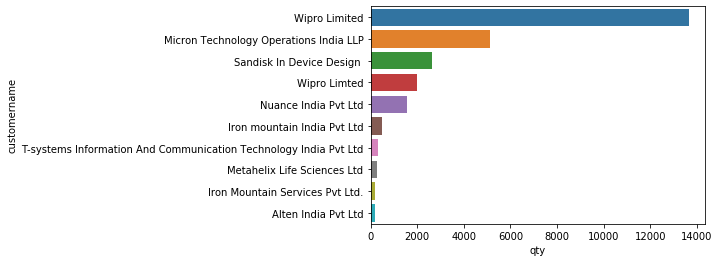

In [77]:
sb.barplot(x=Largest_Cust_Sales.qty,y=Largest_Cust_Sales.customername)

In [24]:
#Who is your largest customer interm of Sales Amount

In [82]:
Largest_Sales_amount = Sorting_df(data_combined,['customername','invvalue'],10)

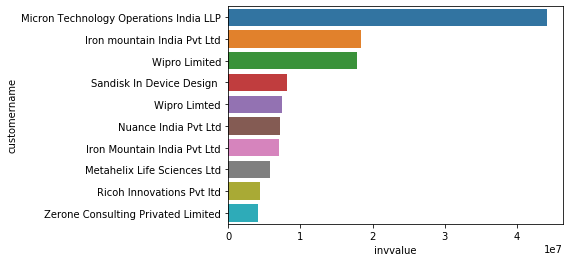

In [83]:
sb.barplot(x=Largest_Sales_amount.invvalue,y=Largest_Sales_amount.customername)

In [25]:
#Which is highest selling product

In [84]:
Highest_Prod_Selling = Sorting_df(data_combined,['description','qty'],10)

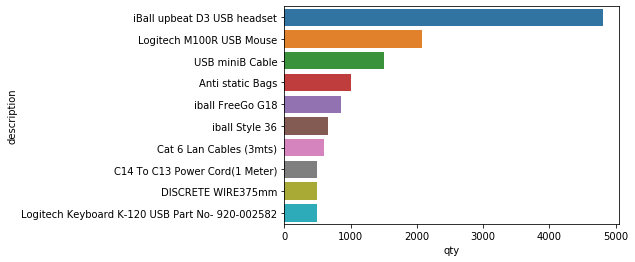

In [85]:
sb.barplot(x=Highest_Prod_Selling.qty,y=Highest_Prod_Selling.description)

In [26]:
#which are product sells in amount wise quantity

In [86]:
Highest_Prodsales_amount = Sorting_df(data_combined,['description','invvalue'],10)

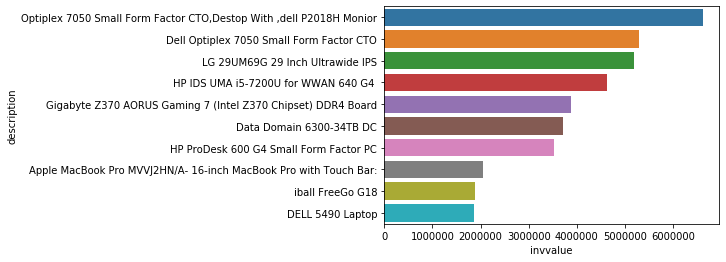

In [87]:
sb.barplot(x=Highest_Prodsales_amount.invvalue,y=Highest_Prodsales_amount.description)

In [27]:
#Which branch has highest revenue

In [88]:
Branch_highest_revenue = Sorting_df(data_combined,['branch','invvalue'],5)

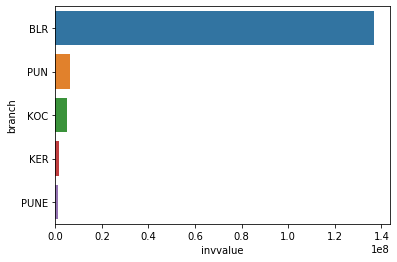

In [90]:
sb.barplot(x=Branch_highest_revenue.invvalue,y=Branch_highest_revenue.branch)

In [28]:
#Which month has a high volume of sales
 # function to be written to take invdate disect in months and invvalue
 # 

In [ ]:
data_combined.invdate.value_counts(dropna=True)

In [112]:
# Loop to clean wrong date 

dateinv =[]
for i in data_combined.index:
    dateinv.append(str(i).replace('2109','2019'))
    
data_combined['invdate'] = dateinv

In [ ]:
data_combined['invvalue'] = data_combined.invvalue.astype(float)

In [113]:
print (data_combined.invvalue.mean())
print (data_combined.invvalue.median())
print (data_combined.invvalue.mode())

91964.66940817566
15600.0
0    0
dtype: object


In [ ]:
#idx_outlierdata =[]
#data_1819[data_1819['invvalue']>1500000].index

#for i in data_1819['invvalue']:
#    if(i>1500000):
#        idx_outlierdata.append(i)


In [ ]:
#print (idx_outlierdata)
#print (idx_outlierdata_1)
#print (idx_outlierdata_2)

In [ ]:
#data_1920[data_1920.invvalue<0.00]

In [ ]:
#idx_outlierdata_1

In [ ]:
#data_1819.replace(value='8920.8',to_replace=idx_outlierdata,inplace=True)

In [ ]:
#data_1920.replace(value='41300',to_replace=idx_outlierdata_1,inplace=True)
#data_1920.replace(value='41300',to_replace=idx_outlierdata_2,inplace=True)

In [ ]:
#data_1819['invdate']

Moving average plot on the data

In [114]:
data_combined = data_combined.set_index('invdate')

In [222]:
data_combined

,slno,branch,customername,custpono,description,qty,baseprice,totalprice,taxstructure,cgst,sgst,igst,totalwithtaxamount,invno,invvalue
invdate,,,,,,,,,,,,,,,
2019-12-19 00:00:00,NaN,BLR,Micron Technology Operations India LLP,3500438556,USB miniB Cable,1500.0,68.0,102000.0,0.0,0.00,0.00,0.0,102000.0,2919201365,162000
2018-07-18 00:00:00,277.0,BLR,Wipro Limited,5500117369,iBall upbeat D3 USB headset,605.0,625.0,378125.0,18.0,34031.25,34031.25,0.0,446187.5,2918191140,0
2018-07-04 00:00:00,192.0,BLR,Sandisk In Device Design,4300226633,Cat 6 Lan Cables (3mts),600.0,115.0,69000.0,18.0,6210.00,6210.00,0.0,81420.0,2918191108,0
2019-12-19 00:00:00,NaN,BLR,Micron Technology Operations India LLP,3500438556,C14 To C13 Power Cord(1 Meter),500.0,120.0,60000.0,0.0,0.00,0.00,0.0,60000.0,2919201365,NaN
2019-03-29 00:00:00,1104.0,BLR,Sandisk In Device Design,IN5310-P002750,DISCRETE WIRE375mm,500.0,140.0,70000.0,18.0,6300.00,6300.00,0.0,82600.0,2918191612,82600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-29 00:00:00,997.0,BLR,Sobha Limited,1-Pur-25012019-APO-000753,Epson EB-S41,1.0,22000.0,22000.0,18.0,1980.00,1980.00,0.0,25960.0,2918191536,28160
2019-01-29 00:00:00,996.0,BLR,Iron Mountain Services Pvt Ltd.,IMS/42/2018-19,HP ProDesk 600 G3 Small Form Factor,1.0,85000.0,85000.0,0.0,0.00,0.00,0.0,85000.0,2918191535,85000
2020-01-23 00:00:00,NaN,PUN,T-systems Information And Communication Techno...,Mail Confirmation,Single 3.5mm Smartphone Headset Adapter Cable,1.0,580.0,580.0,18.0,52.20,52.20,0.0,684.4,2719201048,684


In [116]:
#data_1819[data_1819.index == '2018-07-18 00:00:00']  
#data_1819[data_1819.index =='2018-07-16 00:00:00']

In [223]:
data_combined_1 = data_combined.groupby('invdate')['invvalue'].sum().reset_index()

In [224]:
data_combined_1[data_combined_1.index == '2018-07-18 00:00:00']  

,invdate,invvalue


In [225]:
data_combined_1 = data_combined_1.set_index('invdate')

In [397]:
data_combined_1 = data_combined_1.reset_index(drop=True)

In [398]:
data_combined_1

,invvalue
0,30680.0
1,466302.0
2,107923.0
3,175042.0
4,485100.0
...,...
414,397341.0
415,1179703.0
416,253304.0
417,417682.0


In [226]:
#data_1819_1 = data_1819_1.set_index('invdate')

In [227]:
data_combined_1.drop(index='2000-01-01 00:00:00',inplace=True)

In [228]:
#y = data_combined_1['invvalue']

In [399]:
y = data_combined_1.invvalue
train = y[0:300]
test = y[301:419]


In [400]:
print (train.shape,test.shape)

(300,) (118,)


In [401]:
test

301     494447.0
302    1326746.0
303      10200.0
304      54931.0
305    2183689.2
         ...    
414     397341.0
415    1179703.0
416     253304.0
417     417682.0
418      65619.0
Name: invvalue, Length: 118, dtype: float64

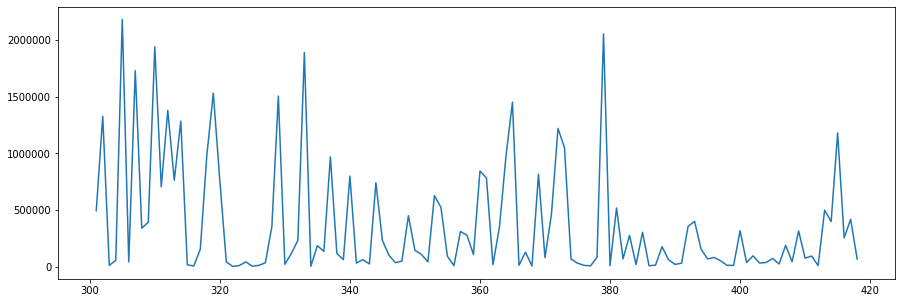

In [402]:
test.plot(figsize=(15, 5))
plt.show()

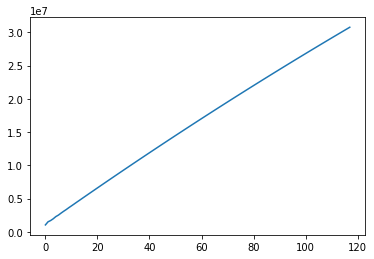

In [403]:
plt.plot(predicitions)

In [131]:
#sb.lineplot(x=data_1819.index,y=data_1819.invvalue)

In [107]:
#!pip install statsmodels

Forecating or Statistical method used and Why?

Statistical evidence of training, Validating and forecasting

In [167]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [133]:
import warnings 
warnings.filterwarnings('ignore')

In [519]:
model_arima = ARIMA(train,order=(8, 0, 8)) #214,8, 0, 8
model_arima_fit = model_arima.fit()
print (model_arima_fit.aic)

8949.824091701515


In [520]:
predicitions =[]
predicitions = model_arima_fit.predict(start=300,end=419)

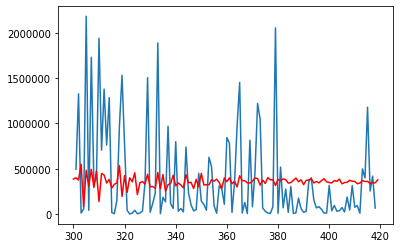

In [521]:
plt.plot(test)
plt.plot(predicitions,color='red')

In [548]:
forecast = pd.DataFrame(forecast)

In [539]:
list_a = []

for i in range(419,449):
    list_a.append(i)

In [549]:
forecast

,0
0,385278.702767
1,399381.050783
2,374325.535715
3,550665.295216
4,81771.331067
5,483563.927596
6,307056.299317
7,494140.761766
8,293669.659288
9,472529.173453


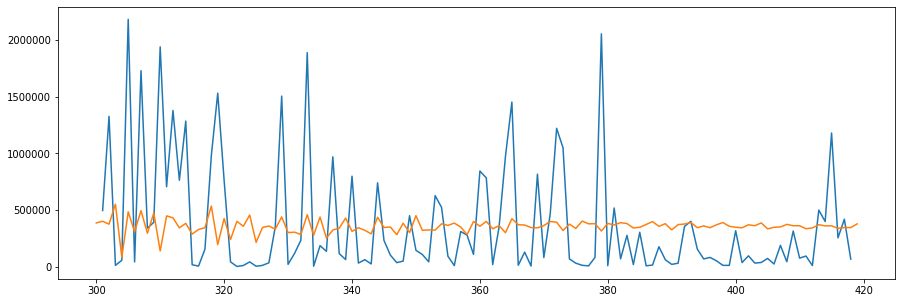

In [551]:
test.plot(figsize=(15,5))
plt.plot(predicitions)

In [552]:
forecast = model_arima_fit.forecast(steps=100)[0]

In [553]:
forecast

array([385278.70276668, 399381.05078285, 374325.53571475, 550665.29521649,
        81771.33106667, 483563.92759571, 307056.29931732, 494140.76176634,
       293669.65928807, 472529.17345312, 137314.62185449, 447372.40287974,
       430152.28763721, 341590.73519254, 381275.89450978, 286610.38125026,
       327729.23328723, 342672.56441522, 534458.98099311, 193775.30066853,
       423790.45000791, 239001.75036333, 399302.93034092, 355377.85346961,
       455052.48438105, 213645.72186229, 344933.38479858, 357848.11455433,
       329679.80498777, 438163.84345879, 299672.79634216, 303663.41292727,
       282359.16725278, 458293.34058227, 276960.11956927, 437217.72182545,
       251359.00030124, 322653.32838391, 338581.56432454, 427827.57406111,
       310983.40753274, 342330.72990226, 320188.64204241, 288525.76474332,
       434958.76194103, 344585.30910655, 349202.01736875, 280894.9043845 ,
       382703.32624166, 299483.36976967, 449048.09152559, 319825.54417924,
       323433.88520282, 3

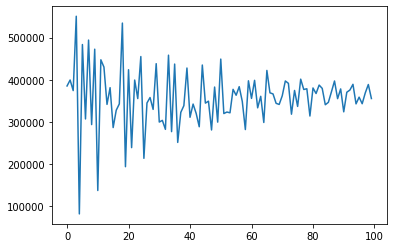

In [557]:
plt.plot(forecast)

In [500]:
import itertools

p=d=q =range(0,9)

pdq_ran = list(itertools.product(p,d,q))

In [501]:

#Check for the min aic
for para in pdq_ran:
    try:
        model_arima = ARIMA(train,order=para)
        model_arima_fit = model_arima.fit()
        print (model_arima_fit.aic, para)
    except:
        continue

8937.655657393374 (0, 0, 0)
8939.655403745322 (0, 0, 1)
8941.65070306887 (0, 0, 2)
8943.650632573237 (0, 0, 3)
8945.542848993962 (0, 0, 4)
8947.540558111363 (0, 0, 5)
8949.44238450144 (0, 0, 6)
8951.408634576646 (0, 0, 7)
8951.112922692024 (0, 0, 8)
9115.913537932687 (0, 1, 0)
8912.930309448013 (0, 1, 1)
8914.90484972563 (0, 1, 2)
8916.856723194458 (0, 1, 3)
8918.827004635039 (0, 1, 4)
8920.58971530918 (0, 1, 5)
8922.574782368036 (0, 1, 6)
8924.335209093755 (0, 1, 7)
8926.207261139427 (0, 1, 8)
9413.373464501505 (0, 2, 0)
9094.136958965275 (0, 2, 1)
8899.903971113627 (0, 2, 2)
8901.852492420123 (0, 2, 3)
8903.917589132456 (0, 2, 4)
8905.840930386023 (0, 2, 5)
8907.6827614754 (0, 2, 6)
8909.736530149159 (0, 2, 7)
8911.55747392886 (0, 2, 8)
8939.655405714762 (1, 0, 0)
8941.652661650893 (1, 0, 1)
8943.639623406223 (1, 0, 2)
8945.633429263 (1, 0, 3)
8947.535336082485 (1, 0, 4)
8949.534907875212 (1, 0, 5)
8951.438478283268 (1, 0, 6)
8950.656489612817 (1, 0, 7)
8951.378738187135 (1, 0, 8)
90